In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(11990, 512, 512, 1)

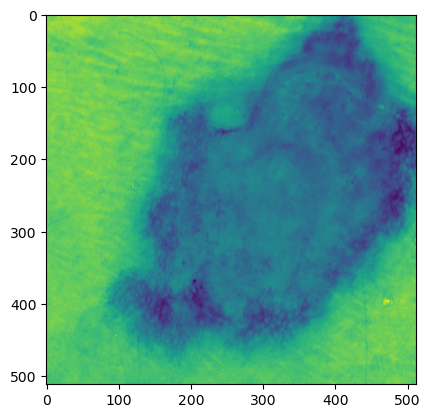

In [4]:
imshow(images[100])

In [5]:
masks.shape

(11990, 512, 512, 1)

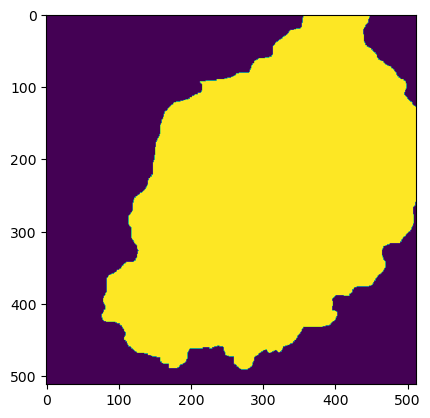

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

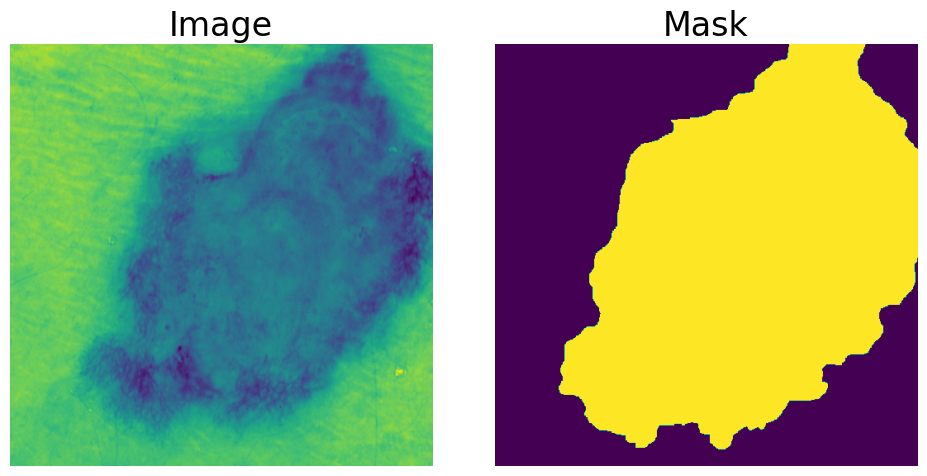

In [10]:
plt.rcParams['font.size'] = 20
gp2.Util.display_image_and_mask(images[100], masks[100])

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpa6xnmdn7kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpbpre_1wgkuc_unet2d


In [11]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpbpre_1wgkuc_unet2d
Verbose mode active!


In [12]:
R.classifier = C ### use custom classifier

In [13]:
R.run(images, masks, runs=15, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_15.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
38/38 [==============================] - 37s 696ms/step - loss: 0.4186 - dice_coeff: 0.5732 - val_loss: 0.4216 - val_dice_coeff: 0.5572
Epoch 2/100
38/38 [==============================] - 18s 484ms/step - loss: 0.4064 - dice_coeff: 0.5809 - val_loss: 0.4218 - val_dice_coeff: 0.5803
Epoch 3/100
38/38 [==============================] - 18s 488ms/step - loss: 0.4044 - dice_coeff: 0.5770 - val_loss: 0.3665 - val_dice_coeff: 0.5915
Epoch 4/100
38/38 [==============================] - 18s 486ms/step - loss: 0.3825 - dice_coeff: 0.6148 - val_loss: 0.3964 - val_dice_coeff: 0.5962
Epoch 5/100
38/38 [==============================] - 19s 494ms/step - loss: 0.3863 - dice_coeff: 0.6050 - val_loss: 0.3808 - val_dice_coeff: 0.5909
Epoch 6/100
38/38 [==============================] - 18s 483ms/step - loss: 0.3753 - dice_coeff: 0.6225 - val_loss: 0.3610 - val_dice_coeff: 0.5995
Epoch 7/100
38/38 [==============================] - 18s 488ms/step 

Model saved to: /tmp/tmpbpre_1wgkuc_unet2d/kuc_unet2d_4kuc_unet2d_model
History saved to: /tmp/tmpbpre_1wgkuc_unet2d/kuc_unet2d_history_4.pkl
Testing the classifier...
Testing the discriminator...
23/23 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 366 machine labels.
Replacing 122 from 366 !
D_relabeled_ 122
point ids 122
Removed: 122 Filled: 122
TOOK 475.79639887809753 seconds
==== DONE LOOP 5 ====
******
Loop 6
Epoch 1/100
75/75 [==============================] - 30s 397ms/step - loss: 0.2618 - dice_coeff: 0.7434 - val_loss: 0.2673 - val_dice_coeff: 0.7526
Epoch 2/100
75/75 [==============================] - 28s 380ms/step - loss: 0.2377 - dice_coeff: 0.7667 - val_loss: 0.2521 - val_dice_coeff: 0.7516
Epoch 3/100
75/75 [==============================] - 29s 386ms/step - loss: 0.2259 - dice_coeff: 0.7793 - val_loss: 0.2284 - val_dice_coeff: 0.7734
Epoch 4/100
75/75 [==============================] - 29s 385ms/step - loss: 0.2218 - dice_co

137/137 [==============================] - 45s 329ms/step - loss: 0.0356 - dice_coeff: 0.9624 - val_loss: 0.3259 - val_dice_coeff: 0.8805
Epoch 13/100
137/137 [==============================] - 45s 330ms/step - loss: 0.0550 - dice_coeff: 0.9439 - val_loss: 0.2512 - val_dice_coeff: 0.8578
Model saved to: /tmp/tmpbpre_1wgkuc_unet2d/kuc_unet2d_13kuc_unet2d_model
History saved to: /tmp/tmpbpre_1wgkuc_unet2d/kuc_unet2d_history_13.pkl
Testing the classifier...
Testing the discriminator...
23/23 [==============================] - 1s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 357 machine labels.
Replacing 119 from 357 !
D_relabeled_ 119
point ids 119
Removed: 119 Filled: 119
TOOK 719.6912496089935 seconds
==== DONE LOOP 14 ====
******
Loop 15
Epoch 1/100
144/144 [==============================] - 53s 371ms/step - loss: 0.1083 - dice_coeff: 0.8932 - val_loss: 0.2019 - val_dice_coeff: 0.8351
Epoch 2/100
144/144 [==============================] - 47s 327ms/step - loss: 0.0876 - dice_co

In [14]:
R.classifier_scores # after 20 runs of GP2

[[0.34001246094703674, 0.6390572786331177],
 [0.341348260641098, 0.6432579755783081],
 [0.37775203585624695, 0.6376219391822815],
 [0.27623021602630615, 0.6958810091018677],
 [0.2728310823440552, 0.7587769627571106],
 [0.20828434824943542, 0.802503764629364],
 [0.2129324972629547, 0.7965064644813538],
 [0.23322372138500214, 0.852479100227356],
 [0.2473042607307434, 0.8541569709777832],
 [0.23950646817684174, 0.8567508459091187],
 [0.26780351996421814, 0.8577248454093933],
 [0.23543597757816315, 0.8516308069229126],
 [0.2985514998435974, 0.866995632648468],
 [0.26533079147338867, 0.8537538051605225],
 [0.33993181586265564, 0.8732398152351379]]

In [15]:
R.discriminator_scores # after 20 runs of GP2

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

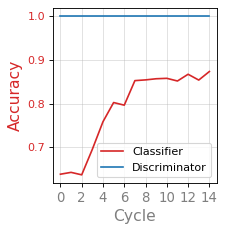

In [16]:
R.plot() # after 20 runs of GP2

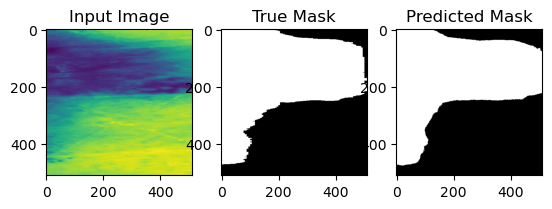

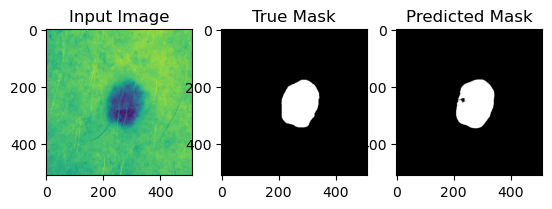

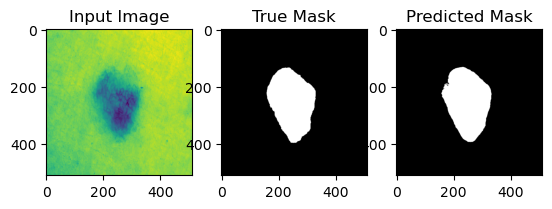

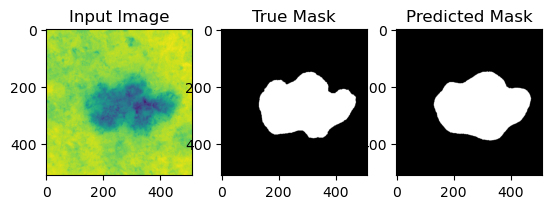

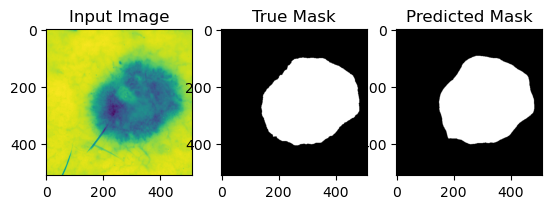

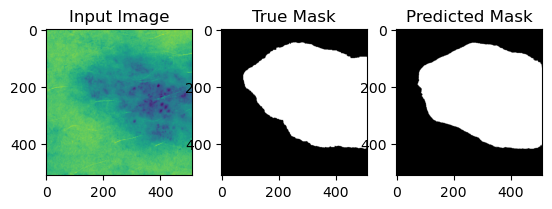

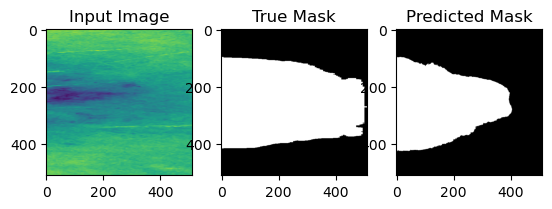

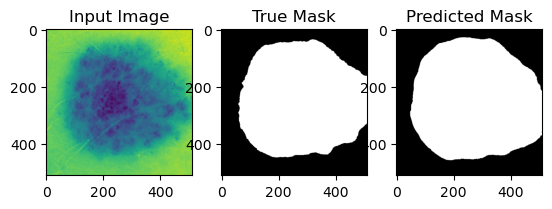

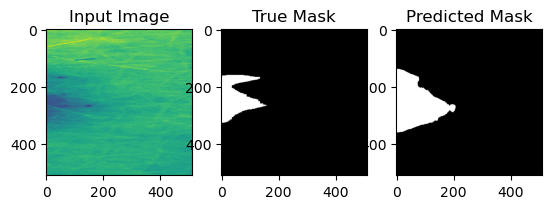

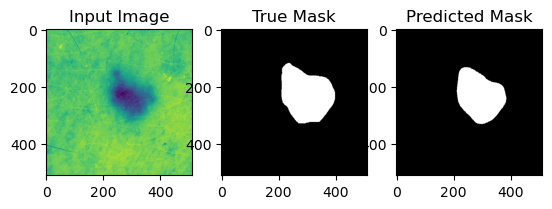

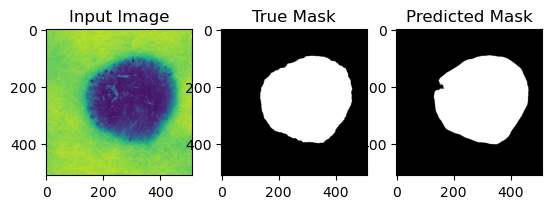

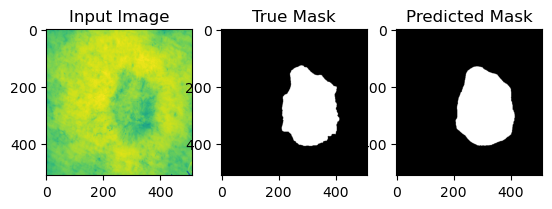

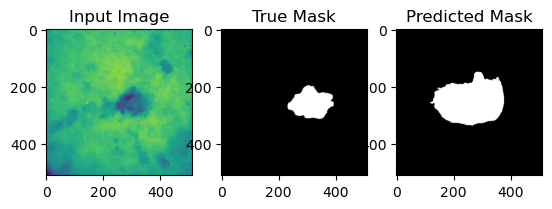

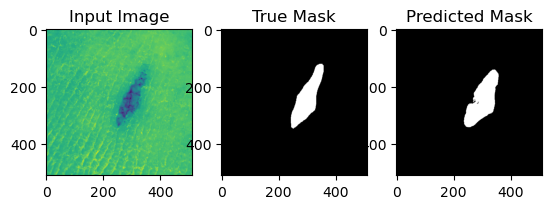

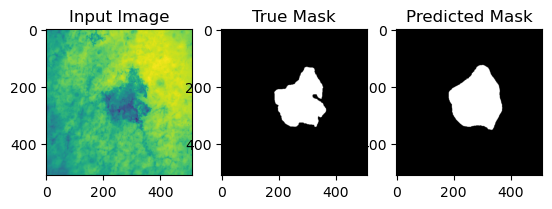

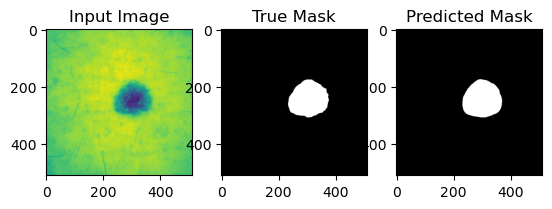

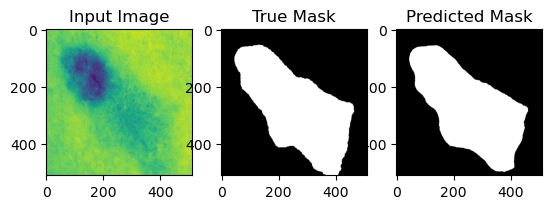

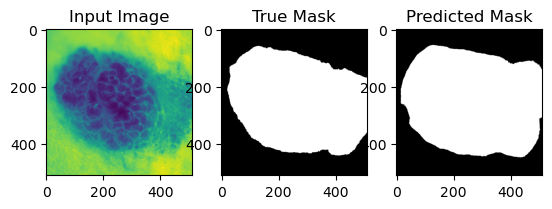

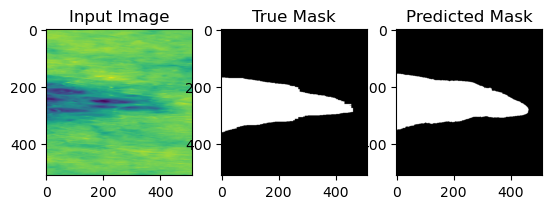

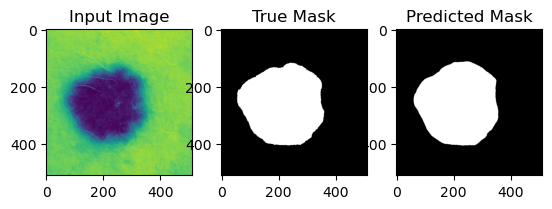

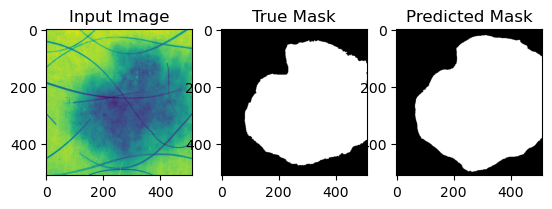

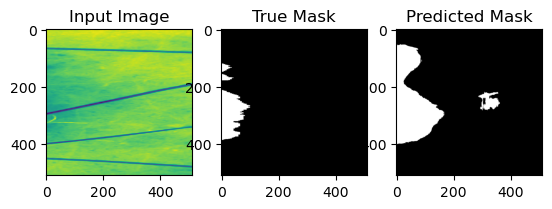

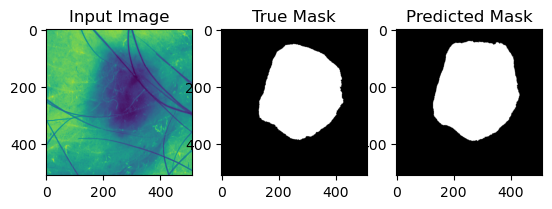

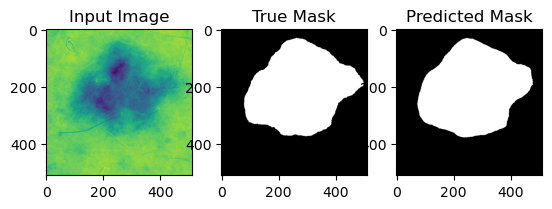

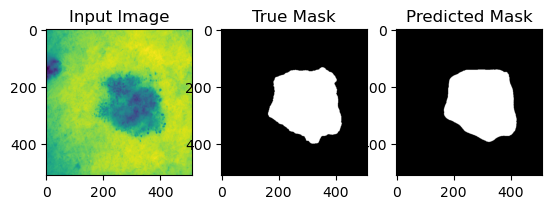

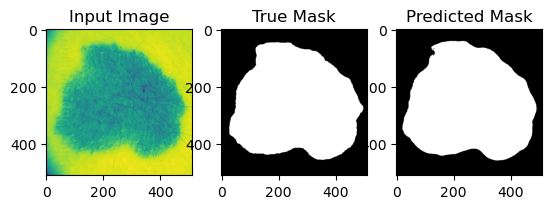

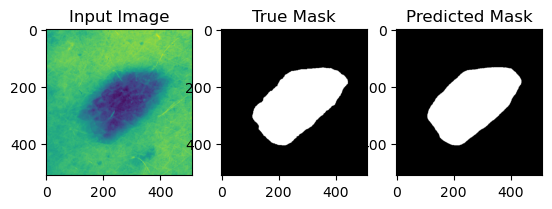

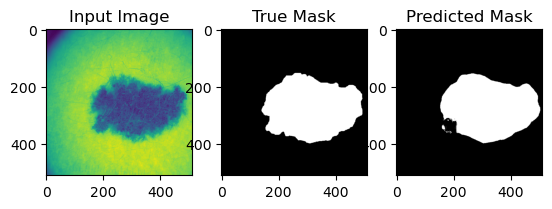

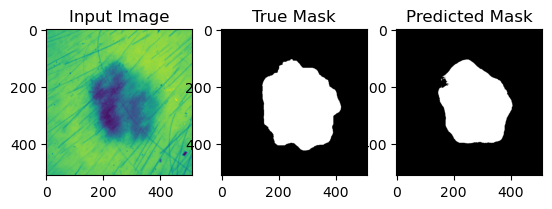

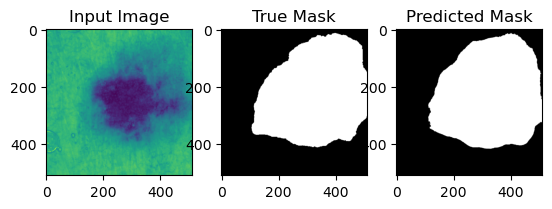

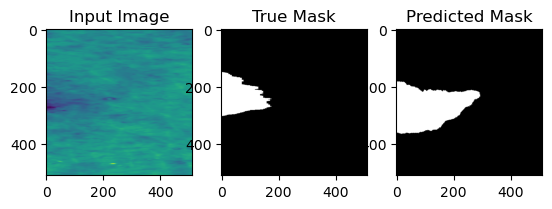

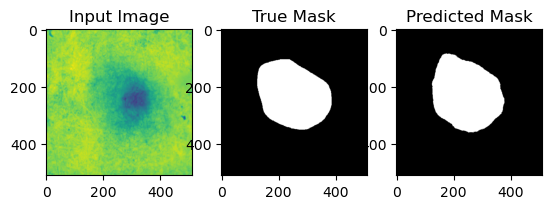

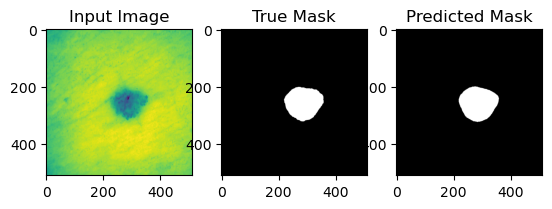

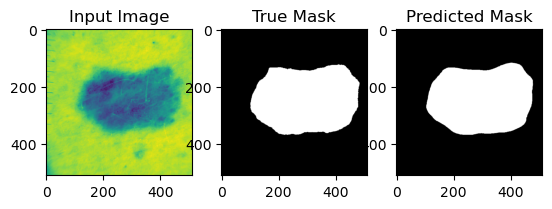

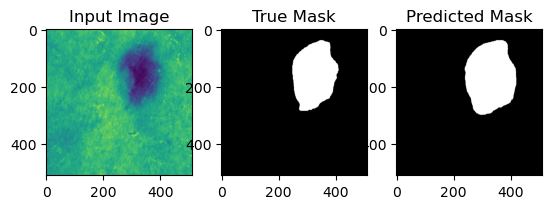

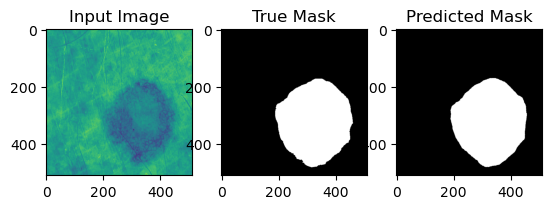

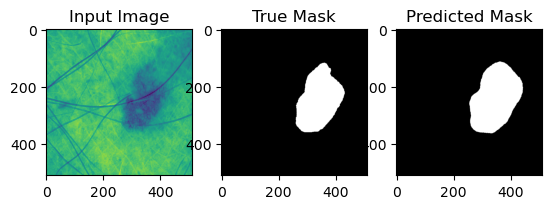

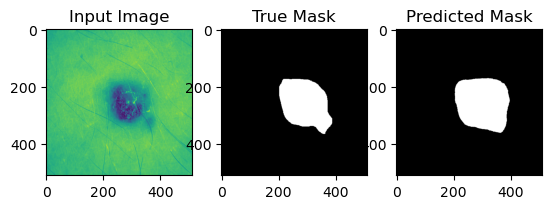

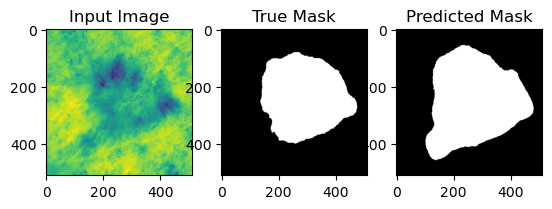

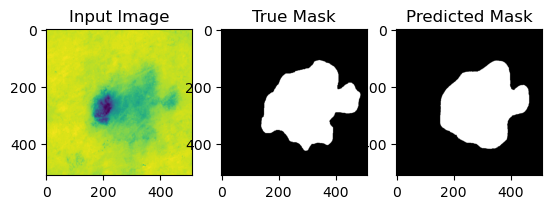

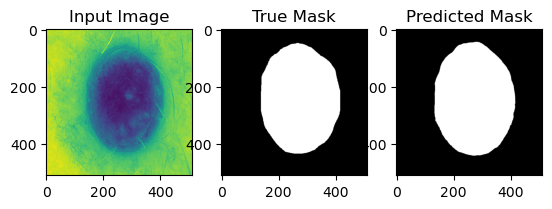

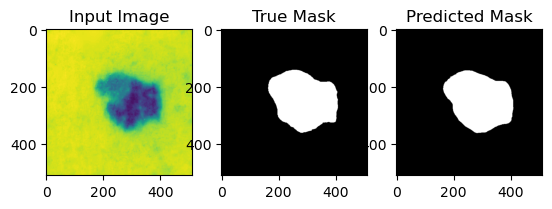

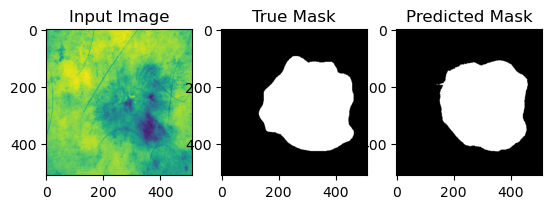

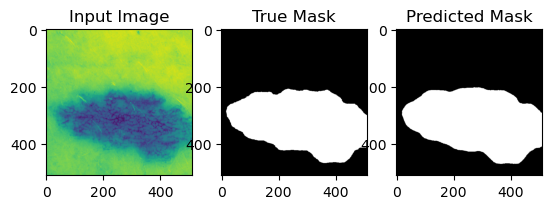

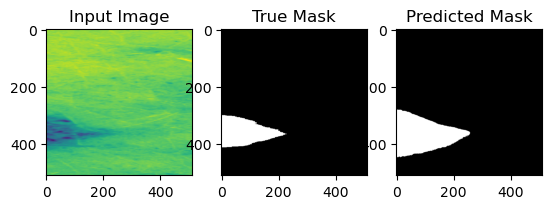

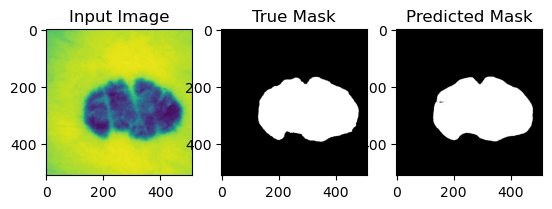

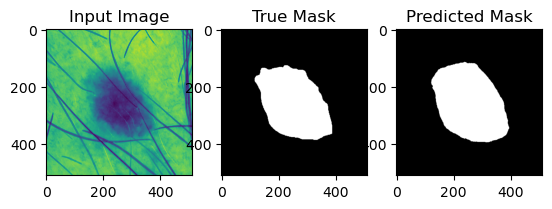

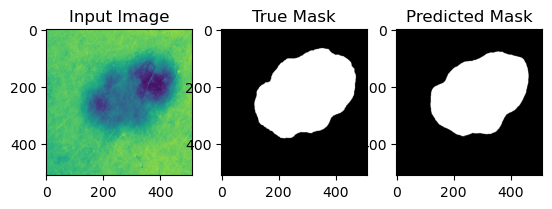

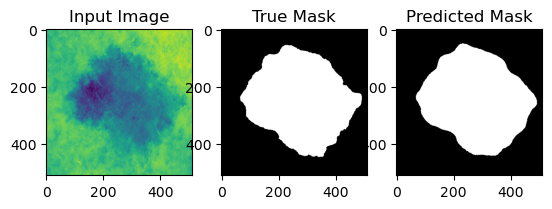

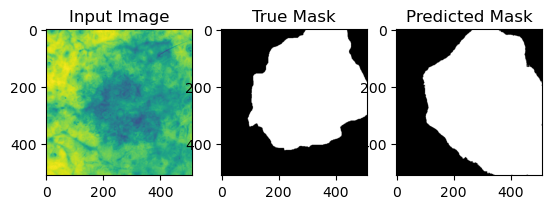

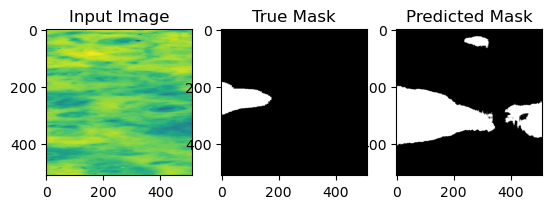

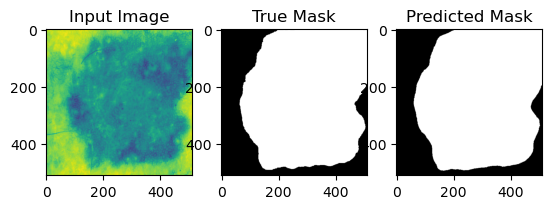

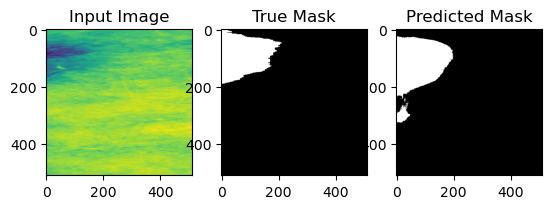

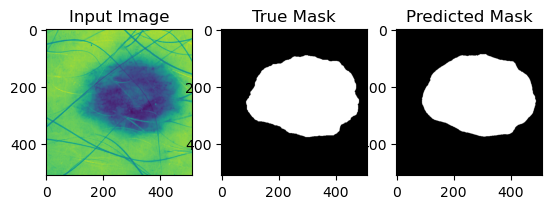

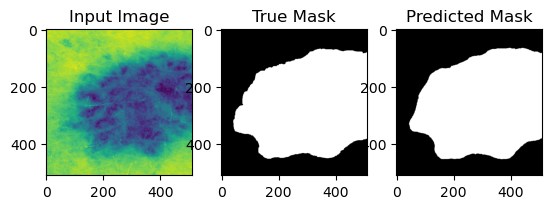

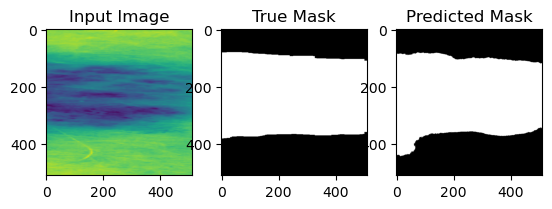

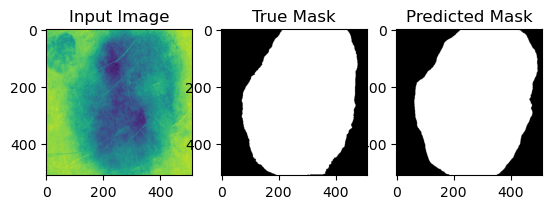

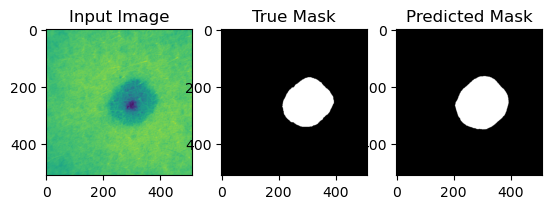

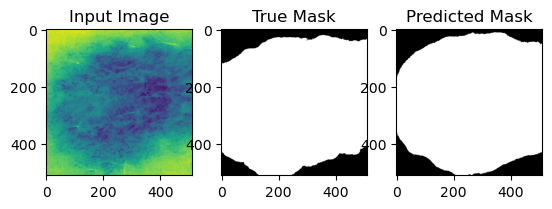

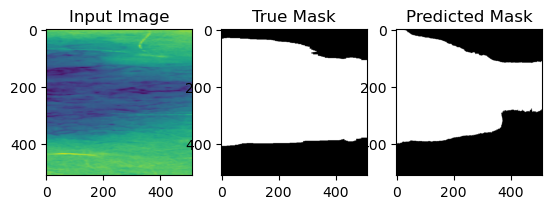

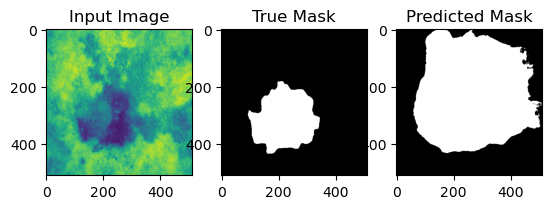

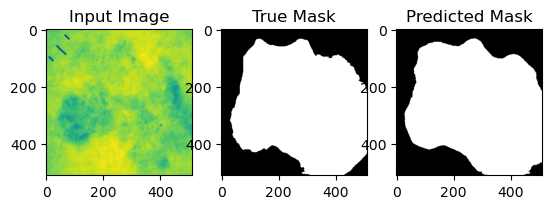

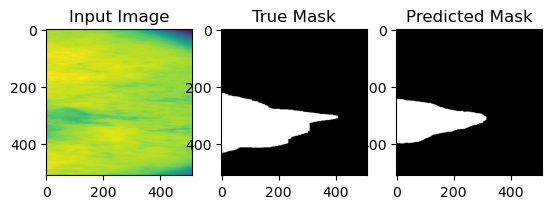

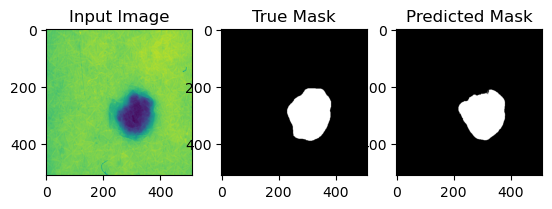

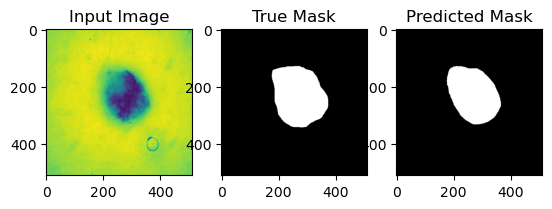

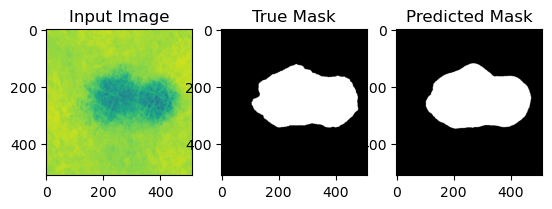

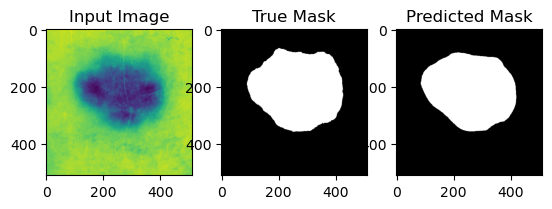

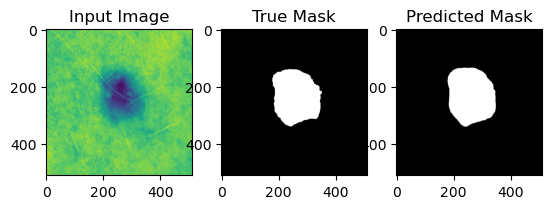

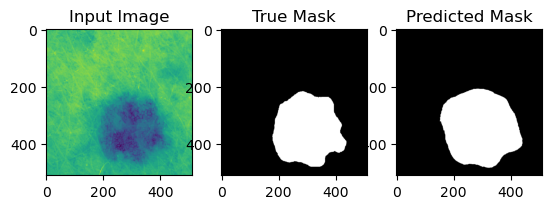

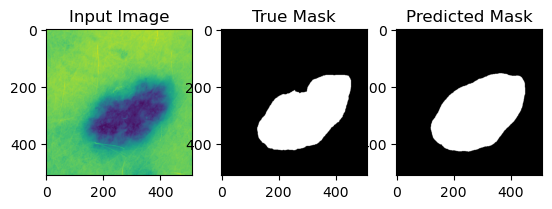

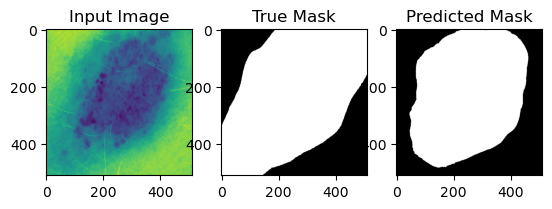

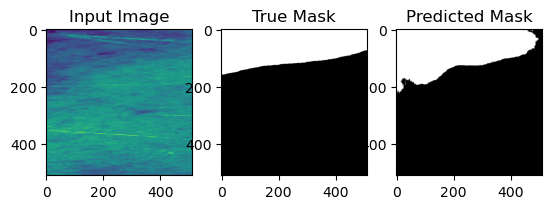

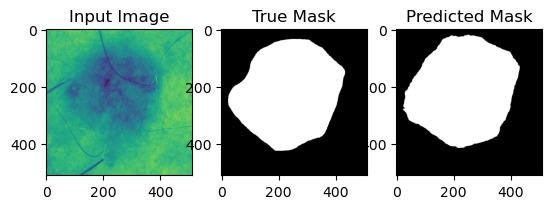

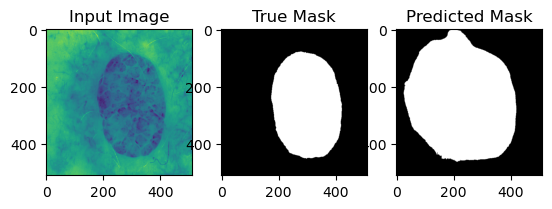

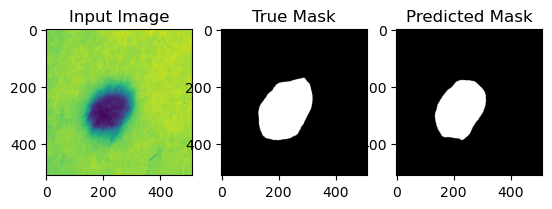

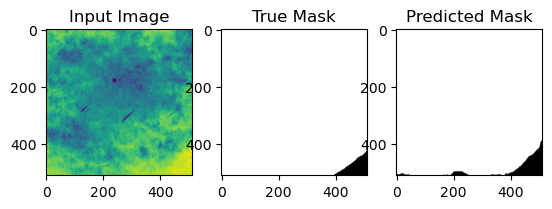

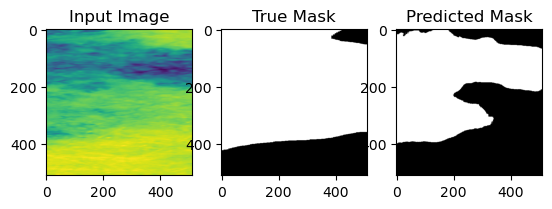

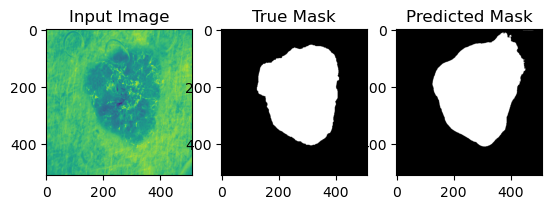

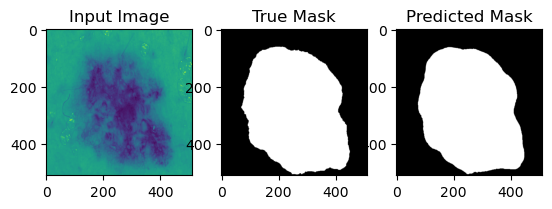

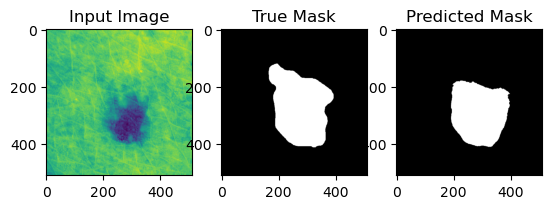

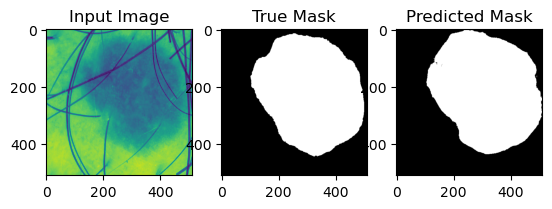

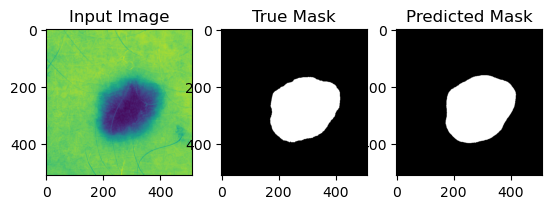

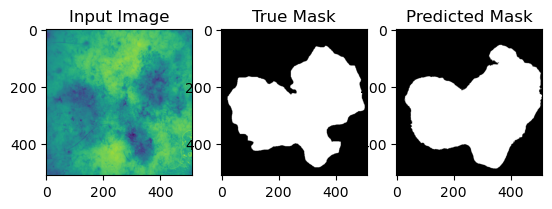

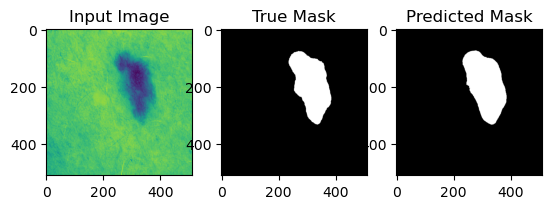

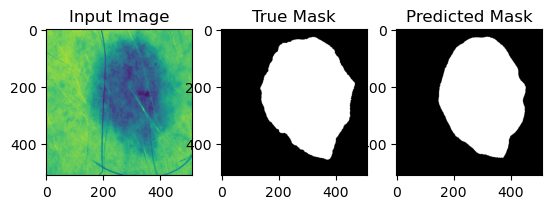

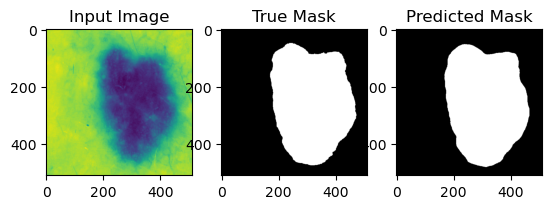

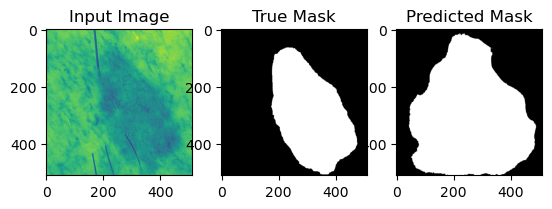

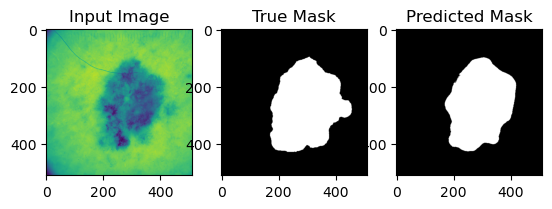

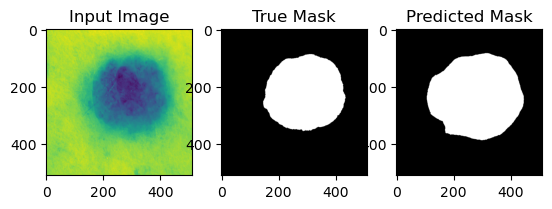

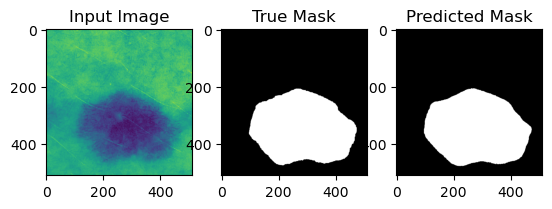

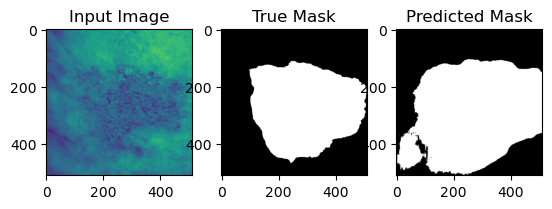

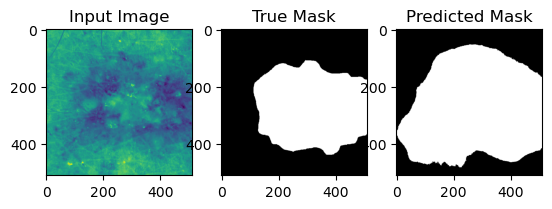

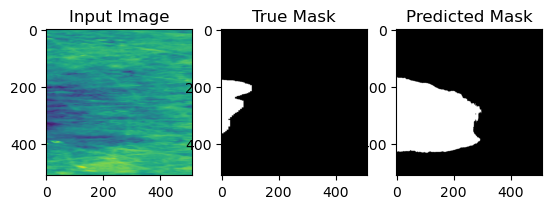

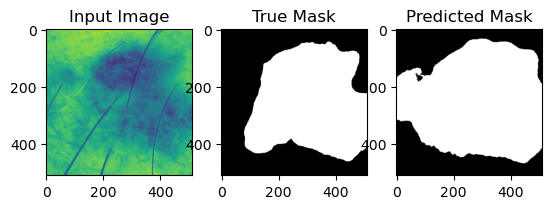

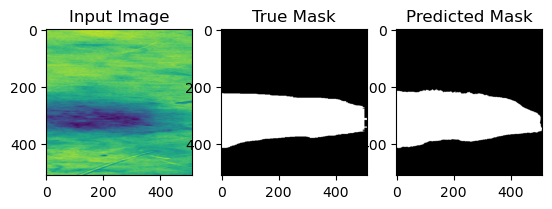

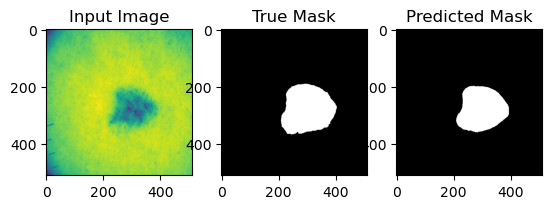

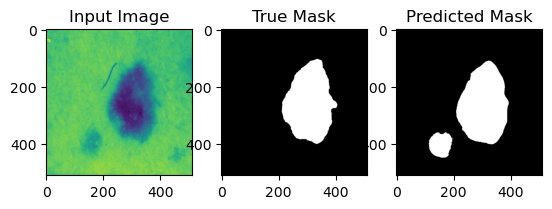

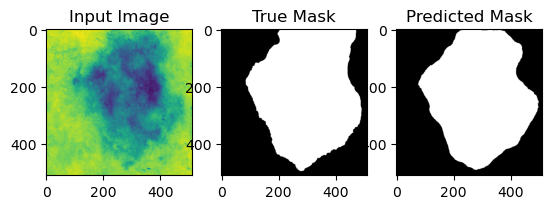

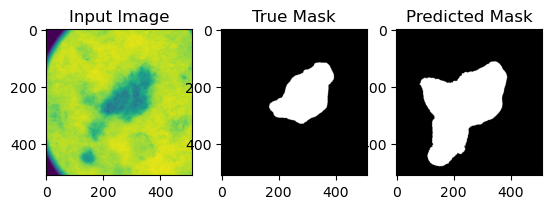

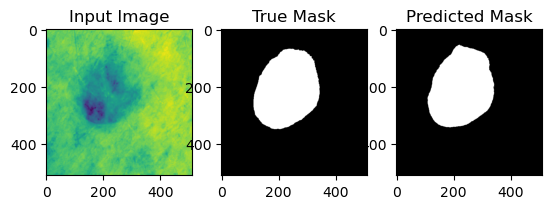

In [17]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 20 runs of GP2